# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [62]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [63]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

In [64]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 10 00:34:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0              40W / 300W |   4430MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [65]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [66]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/notebook/assignment/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Load the image file of dataset
images = np.load(data_path + 'images.npy')      # Complete the code to read the dataset
# Load the labels file of dataset
labels = pd.read_csv(data_path + 'Labels.csv')  # Complete the code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [68]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


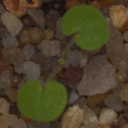

In [69]:
#ploting images
cv2_imshow(images[5])

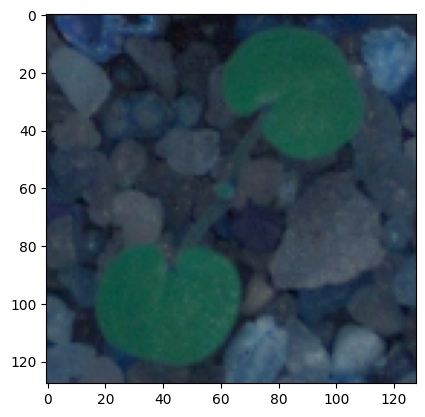

In [70]:
plt.imshow(images[5])

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [71]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

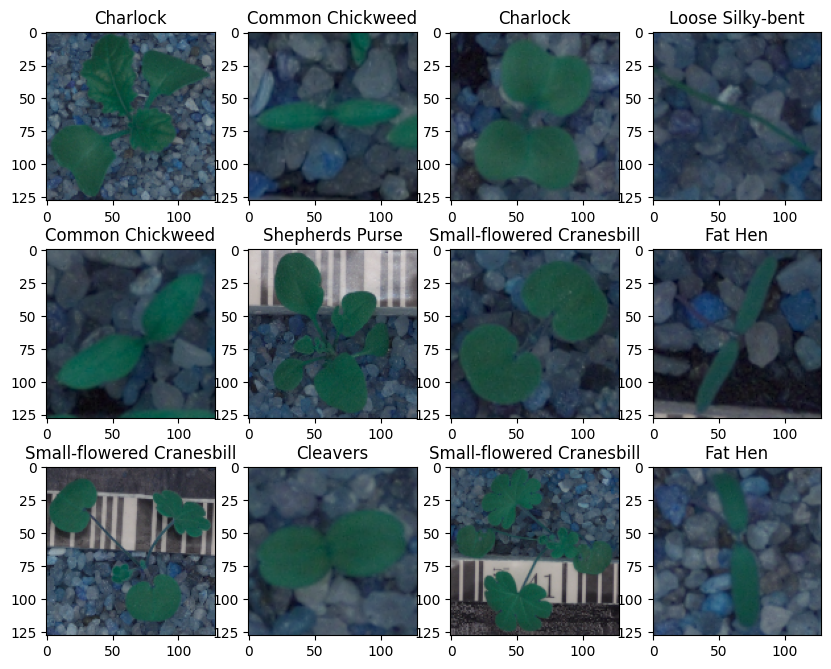

In [72]:
 plot_images(images, labels)

### Checking the distribution of the target variable

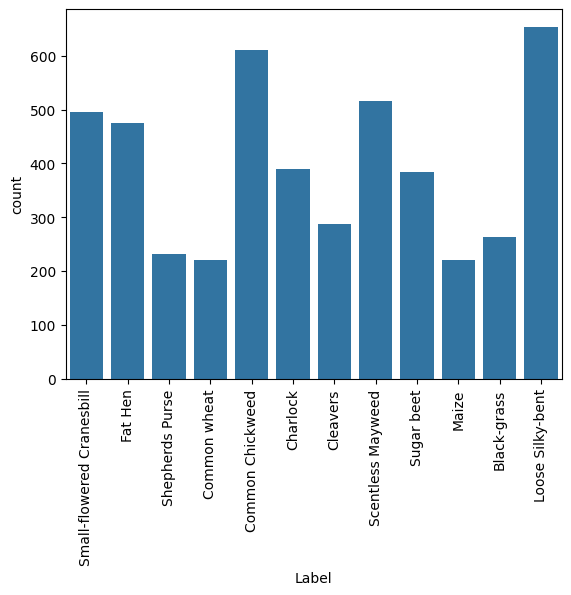

In [73]:
sns.countplot(x=labels['Label'])  # Complete the code to check for data imbalance
plt.xticks(rotation='vertical')
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [74]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

- From the above plot, the dataset is quite balanced.
- Loose Silky-bent with highest


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [75]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

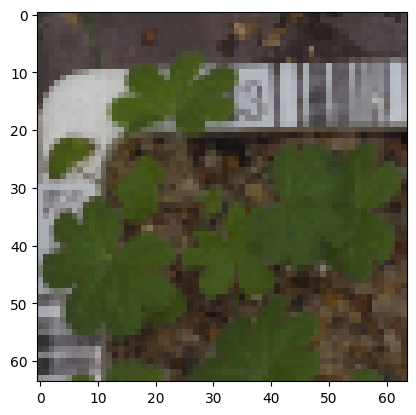

In [76]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur

In [77]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

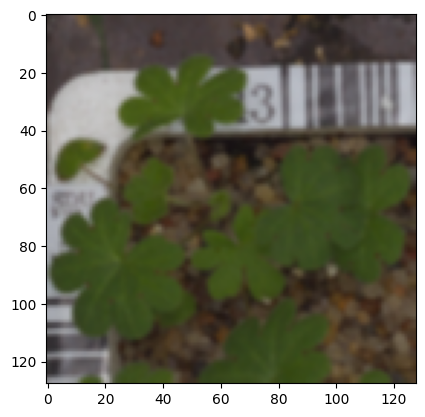

In [78]:
plt.imshow(images_gb[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [79]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size= 0.1, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [80]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [81]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)


In [82]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape    # Shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [83]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [84]:
# Clearing backend
backend.clear_session()

In [85]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

In [86]:
#initialize the model
model1 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu',  padding="same", input_shape=(64, 64, 3)))
#Adding a max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2,2), padding = "same"))

#Adding 2 more conv2D & maxpooling layer
model1.add(Conv2D(64, (3, 3), activation='relu',  padding="same"))
model1.add(MaxPooling2D((2,2), padding = "same"))

model1.add(Conv2D(64, (3, 3), activation='relu',  padding="same"))
model1.add(MaxPooling2D((2,2), padding = "same"))

#Flatten
model1.add(Flatten())

#Add fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

#Adam optimizer
adam = Adam()
#Compile the model and add suitable matric for loss function
model1.compile(optimizer=adam, loss= 'categorical_crossentropy' , metrics=['accuracy'])

#Model summary

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

<b> Fitting the model on the train data

In [87]:
history_1 = model1.fit(
    X_train_normalized, y_train_encoded,
    epochs = 30,
    validation_data = (X_val_normalized, y_val_encoded),
    batch_size = 32,
    verbose=2
)

Epoch 1/30
121/121 - 3s - loss: 2.4556 - accuracy: 0.1019 - val_loss: 2.4380 - val_accuracy: 0.1379 - 3s/epoch - 21ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3461 - accuracy: 0.1947 - val_loss: 2.1150 - val_accuracy: 0.3411 - 625ms/epoch - 5ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0451 - accuracy: 0.3018 - val_loss: 1.8398 - val_accuracy: 0.3925 - 627ms/epoch - 5ms/step
Epoch 4/30
121/121 - 1s - loss: 1.9098 - accuracy: 0.3231 - val_loss: 1.7745 - val_accuracy: 0.3995 - 633ms/epoch - 5ms/step
Epoch 5/30
121/121 - 1s - loss: 1.8028 - accuracy: 0.3494 - val_loss: 1.6256 - val_accuracy: 0.4346 - 643ms/epoch - 5ms/step
Epoch 6/30
121/121 - 1s - loss: 1.7453 - accuracy: 0.3642 - val_loss: 1.4932 - val_accuracy: 0.4696 - 638ms/epoch - 5ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6830 - accuracy: 0.3972 - val_loss: 1.4642 - val_accuracy: 0.4953 - 667ms/epoch - 6ms/step
Epoch 8/30
121/121 - 1s - loss: 1.6208 - accuracy: 0.4190 - val_loss: 1.3429 - val_accuracy: 0.5421 - 630ms/epoch - 5ms/step
Ep

**Model Evaluation**

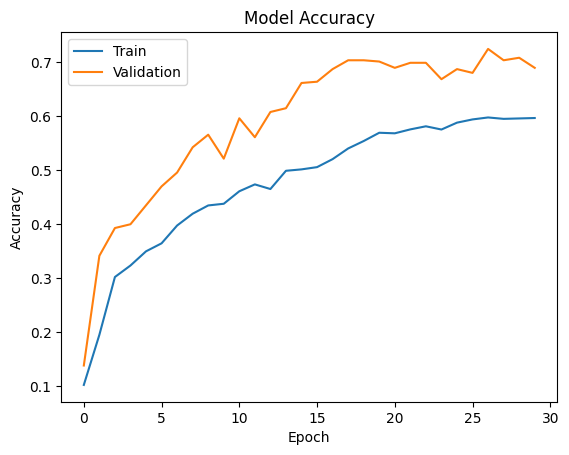

In [88]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <b> Fitting the model on the test data

In [89]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.0247 - accuracy: 0.7011 - 61ms/epoch - 4ms/step


### **Generating the predictions using test data**

In [90]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


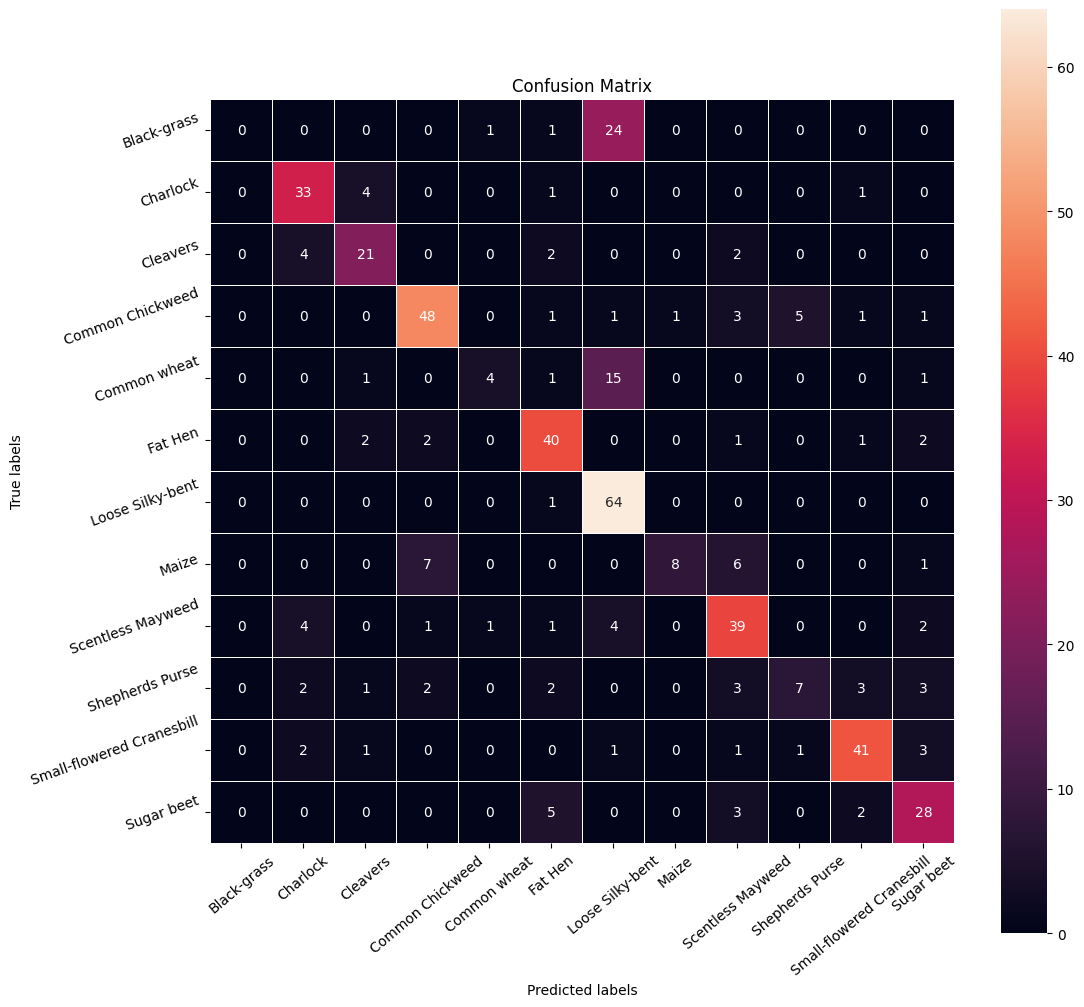

In [91]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [92]:
from sklearn import metrics

# Plotting the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.73      0.85      0.79        39
           2       0.70      0.72      0.71        29
           3       0.80      0.79      0.79        61
           4       0.67      0.18      0.29        22
           5       0.73      0.83      0.78        48
           6       0.59      0.98      0.74        65
           7       0.89      0.36      0.52        22
           8       0.67      0.75      0.71        52
           9       0.54      0.30      0.39        23
          10       0.84      0.82      0.83        50
          11       0.68      0.74      0.71        38

    accuracy                           0.70       475
   macro avg       0.65      0.61      0.60       475
weighted avg       0.67      0.70      0.67       475



<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes Loose **Silky-bent**, **Common Chickweed** & **Scentless Mayweed** are well classified.
- We can also observe that all other classes are mostly misclassified.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [93]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [94]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [95]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [96]:
# Intializing a sequential model
model2 = Sequential()

# 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [97]:
# Fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 5s 64ms/step - loss: 2.1234 - accuracy: 0.2572 - val_loss: 2.4163 - val_accuracy: 0.1332 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 4s 64ms/step - loss: 1.6423 - accuracy: 0.4208 - val_loss: 2.3024 - val_accuracy: 0.2407 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 63ms/step - loss: 1.4465 - accuracy: 0.4880 - val_loss: 2.2377 - val_accuracy: 0.3084 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 4s 65ms/step - loss: 1.3623 - accuracy: 0.5210 - val_loss: 2.1035 - val_accuracy: 0.5140 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 64ms/step - loss: 1.2716 - accuracy: 0.5501 - val_loss: 1.8230 - val_accuracy: 0.5093 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 4s 63ms/step - loss: 1.1699 - accuracy: 0.5757 - val_loss: 1.9569 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 62ms/step - loss: 1.1

**Model Evaluation**

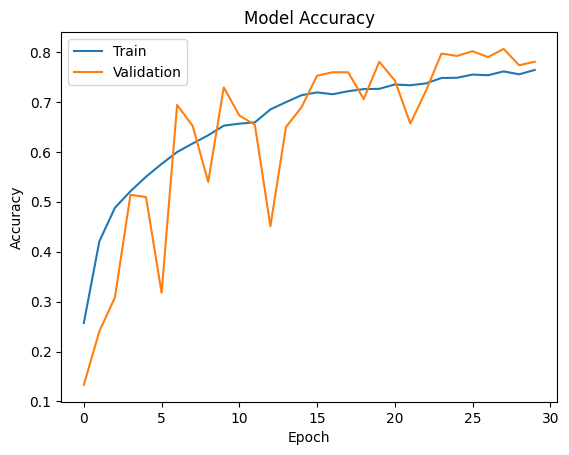

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [99]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9038 - accuracy: 0.7179 - 56ms/epoch - 4ms/step


**Plotting the Confusion Matrix**

In [100]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


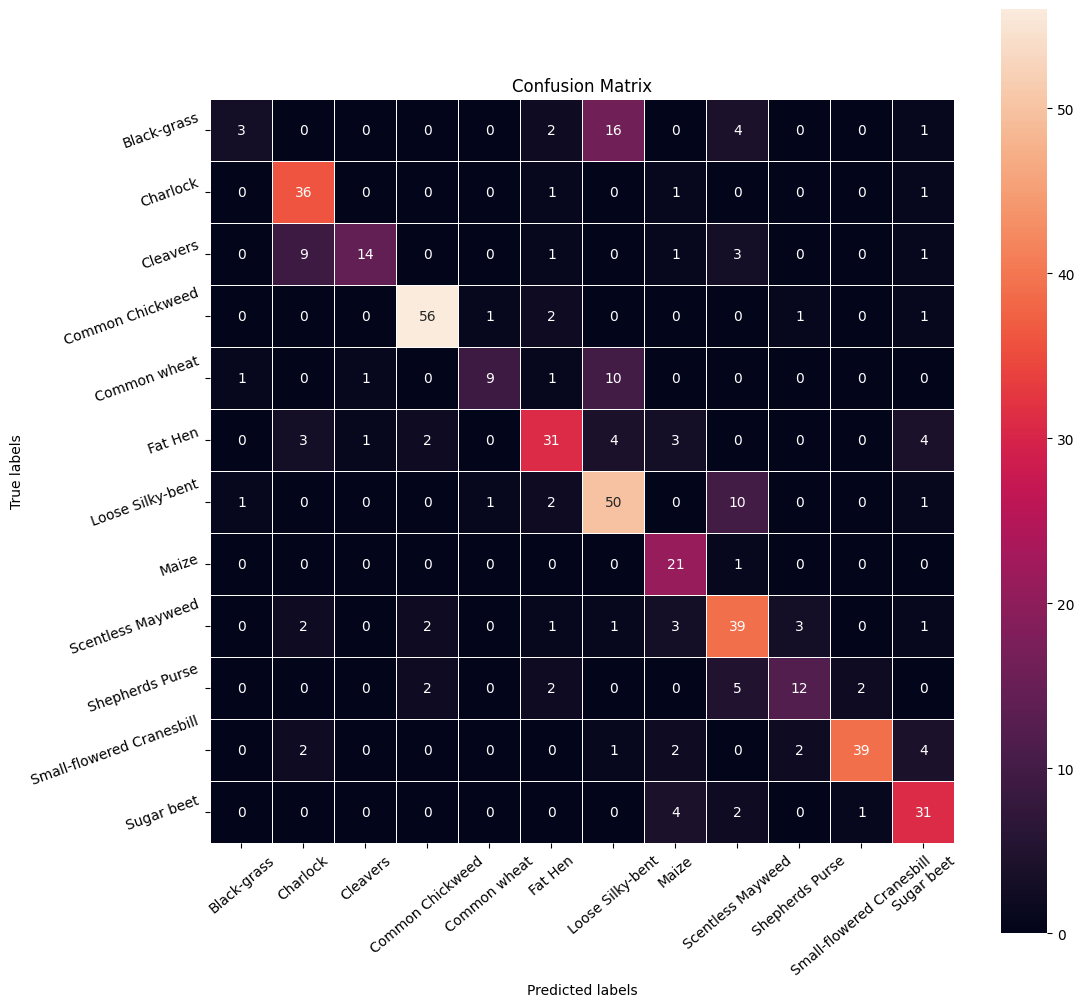

In [101]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [102]:
# Plotting the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.69      0.92      0.79        39
           2       0.88      0.48      0.62        29
           3       0.90      0.92      0.91        61
           4       0.82      0.41      0.55        22
           5       0.72      0.65      0.68        48
           6       0.61      0.77      0.68        65
           7       0.60      0.95      0.74        22
           8       0.61      0.75      0.67        52
           9       0.67      0.52      0.59        23
          10       0.93      0.78      0.85        50
          11       0.69      0.82      0.75        38

    accuracy                           0.72       475
   macro avg       0.73      0.67      0.67       475
weighted avg       0.73      0.72      0.70       475



**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the
 **Common Wheat**  ,  **Black-grass** classes.
- We can observe that this model has outperformed our previous model.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

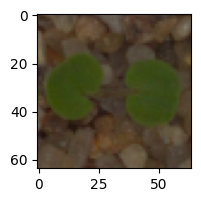

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


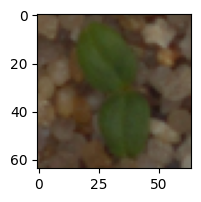

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


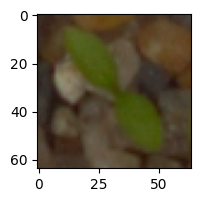

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


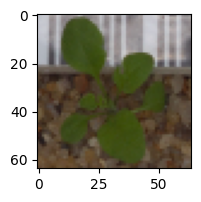

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [103]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector



```
# This is formatted as code
```

# Transfer Learning using VGG16

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the 3,5,7 classes of monkey species.
- The 5th class is the most confused class among all.
- We can observe that this model has outperformed our previous model.

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [104]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top= False, input_shape=(64, 64, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [105]:
for layer in vgg_model.layers:
    layer.trainable = False

In [106]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 66

In [107]:
# Fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 5s 68ms/step - loss: 2.3844 - accuracy: 0.1784 - val_loss: 2.2320 - val_accuracy: 0.3224 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 4s 66ms/step - loss: 2.1533 - accuracy: 0.2810 - val_loss: 2.0448 - val_accuracy: 0.3341 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 65ms/step - loss: 1.9708 - accuracy: 0.3418 - val_loss: 1.8895 - val_accuracy: 0.3692 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 4s 64ms/step - loss: 1.8482 - accuracy: 0.3669 - val_loss: 1.8118 - val_accuracy: 0.3879 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 65ms/step - loss: 1.7464 - accuracy: 0.3822 - val_loss: 1.7377 - val_accuracy: 0.4182 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 4s 64ms/step - loss: 1.6617 - accuracy: 0.4166 - val_loss: 1.6809 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 64ms/step - loss: 1.6

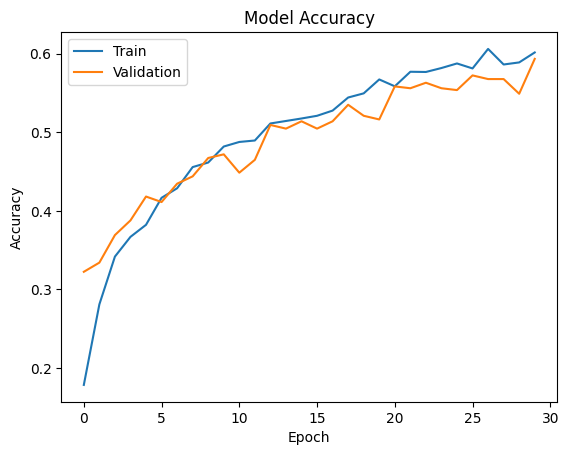

In [108]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [109]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2195 - accuracy: 0.5832 - 114ms/epoch - 8ms/step


In [110]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 0s 5ms/step


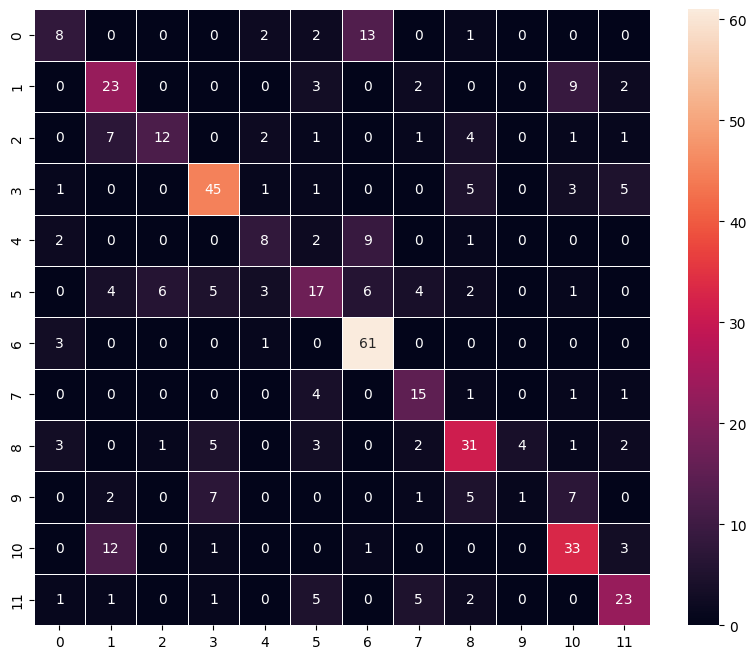

In [111]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

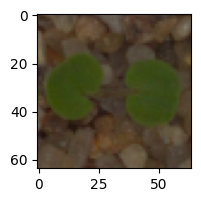

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


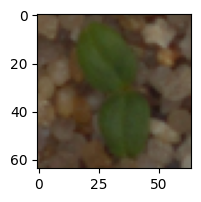

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


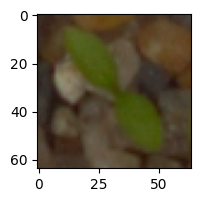

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Scentless Mayweed']
True Label Common Chickweed


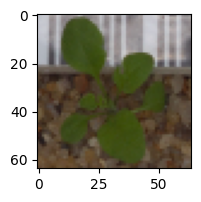

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [112]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

 According to the confusion matrix and accuracy curve,
 the VGG16 model is not good compare to Model-2 & Model-1.
- Thus we can say that Model is our best model and we can use this model to predict and visualize some test images.

# Our Final Model is Model2

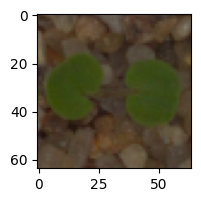

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


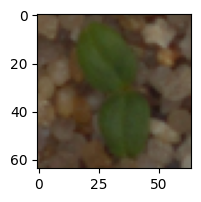

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


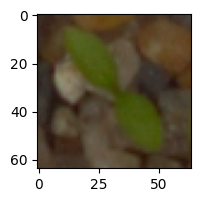

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


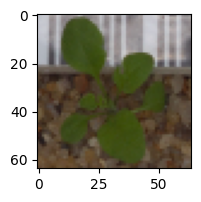

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [113]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector


In [114]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Defining the class names
class_names = [
    'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common Wheat',
    'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse',
    'Small-flowered Cranesbill', 'Sugar beet'
]

# Sample classification report results (replace with actual data)
data = {
    'precision': [0.25, 0.81, 0.75, 0.96, 0.86, 0.87, 0.63, 0.59, 0.77, 0.76, 0.86, 0.76],
    'recall': [0.23, 0.87, 0.62, 0.87, 0.27, 0.71, 0.77, 1.00, 0.88, 0.57, 0.84, 0.84],
    'f1-score': [0.24, 0.84, 0.68, 0.91, 0.41, 0.78, 0.69, 0.75, 0.82, 0.65, 0.85, 0.80],
    'support': [26, 39, 29, 61, 22, 48, 65, 22, 52, 23, 50, 38]
}

# Convert to DataFrame
df = pd.DataFrame(data, index=class_names)

# Display classification report
print("Classification Report:")
print(df)

# Analyze and provide actionable insights
print("\nActionable Insights:")
print("- Consider the precision, recall, and F1-score for each class to identify areas for improvement.")
print("- Address imbalance in classes with low support through techniques like data augmentation or class weighting.")
print("- Evaluate overall model performance using weighted average metrics.")
print("- Analyze misclassification patterns to identify areas for model refinement.")
print("- Experiment with different architectures and optimization techniques to improve performance.")
print("- Validate the model's performance on a separate validation set.")
print("- Continuously monitor and iterate on model improvements.")

# Visualization (optional)
# You can visualize the classification report or other metrics using libraries like matplotlib or seaborn.


Classification Report:
                           precision  recall  f1-score  support
Black-grass                     0.25    0.23      0.24       26
Charlock                        0.81    0.87      0.84       39
Cleavers                        0.75    0.62      0.68       29
Common Chickweed                0.96    0.87      0.91       61
Common Wheat                    0.86    0.27      0.41       22
Fat Hen                         0.87    0.71      0.78       48
Loose Silky-bent                0.63    0.77      0.69       65
Maize                           0.59    1.00      0.75       22
Scentless Mayweed               0.77    0.88      0.82       52
Shepherds Purse                 0.76    0.57      0.65       23
Small-flowered Cranesbill       0.86    0.84      0.85       50
Sugar beet                      0.76    0.84      0.80       38

Actionable Insights:
- Consider the precision, recall, and F1-score for each class to identify areas for improvement.
- Address imbalance in cla

## Actionable Insights and Business Recommendations

### Actionable Insights:

- **Consider the precision, recall, and F1-score for each plant species to identify areas for improvement:**
  Evaluate the precision, recall, and F1-score metrics for each plant species to understand the model's performance in correctly identifying instances of each species. Species with lower scores may indicate specific challenges or areas for improvement. Focus on optimizing the model's performance for species with lower scores by adjusting model architecture, hyperparameters, or training strategies.

- **Address imbalance in species with low support through techniques like data augmentation or class weighting:**
  Imbalanced species with low support can negatively impact the model's ability to generalize. Implement techniques such as data augmentation, oversampling, or class weighting to address species imbalance. By providing the model with more balanced training data, you can improve its ability to accurately classify minority species and enhance overall performance.

- **Evaluate overall model performance using weighted average metrics:**
  Utilize weighted average metrics such as weighted precision, recall, and F1-score to assess the overall performance of the model across all species. Weighted averages account for species support, providing a more comprehensive measure of the model's effectiveness in classification tasks. Aim to optimize these weighted average metrics to ensure robust performance across all species.

- **Analyze misclassification patterns to identify areas for model refinement:**
  Analyze instances where the model misclassifies certain species to identify common patterns or challenges. Determine if certain species are frequently confused with others, which may indicate areas for model refinement or additional feature engineering. By understanding the reasons behind misclassifications, you can make targeted improvements to the model's architecture or training process.

- **Experiment with different architectures and optimization techniques to improve performance:**
  Explore different model architectures, such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), or ensemble methods, to identify the most suitable architecture for your classification task. Experiment with optimization techniques such as learning rate scheduling, batch normalization, or dropout regularization to improve model performance and generalization.

- **Validate the model's performance on a separate validation set:**
  Validate the model's performance on a separate validation set to assess its generalization capability. Split your dataset into training, validation, and test sets to ensure unbiased evaluation of the model's performance. Regularly evaluate the model on the validation set and adjust model parameters or training strategies as needed to improve performance.

- **Continuously monitor and iterate on model improvements:**
  Continuously monitor the model's performance metrics and iterate on improvements based on ongoing evaluation and feedback. Regularly retrain the model with updated data and fine-tune hyperparameters to adapt to changing requirements or data distributions. By continuously iterating on model improvements, you can ensure that the model remains effective and performs well in real-world scenarios.


_____